# Import and initialization

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import html5lib
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Image Histogram

(array([[ 0.,  0.,  0., ..., 57., 32., 89.],
       [ 0.,  0.,  0., ..., 58., 31., 89.],
       [ 0.,  0.,  0., ..., 59., 54., 65.],
       ...,
       [85., 29., 32., ...,  0.,  0.,  0.],
       [85., 29., 32., ...,  0.,  0.,  0.],
       [84., 29., 33., ...,  0.,  0.,  0.]]), array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
       229.5, 255. ]), <a list of 474 Lists of Patches objects>)


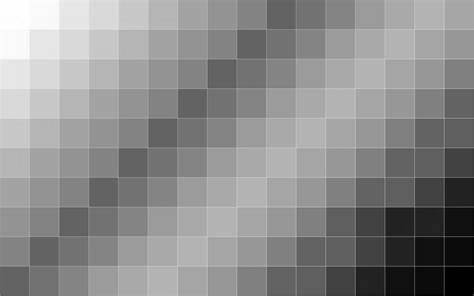

-1

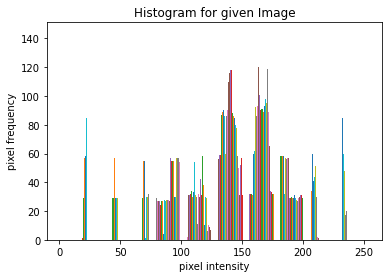

In [2]:
# Read the image
img = cv.imread('momo.jpg', 0)
plt.xlabel("Value")
plt.title('Histogram for given Image')
plt.xlabel("pixel intensity")
plt.ylabel("pixel frequency")
print(plt.hist(img))
cv2_imshow(img)
cv.waitKey()

# Image histogram equalization

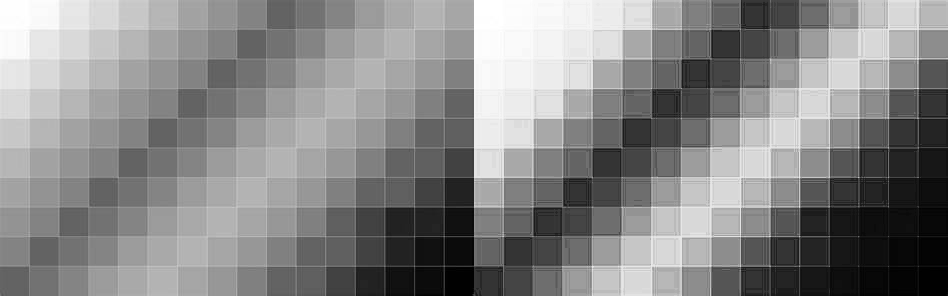

-1

In [3]:
img2 = cv.equalizeHist(img)
res = np.hstack((img, img2))
cv2_imshow(res)
cv.waitKey()

# Covariance between 2 images

In [4]:
def covImage(x, y):
  xbar, ybar = x.mean(), y.mean()
  return np.sum((x-xbar)*(y-ybar))/len(x)-1

print(covImage(img, img2))

1599985.26330393


# Image stretching

In [5]:
# Image stretching kaam nahi kar rahi hai.
#def stretch(image, minimum, maximum):
#  image = (image - minimum) // (maximum - minimum)
#  image[image < 0] = 0
#  image[image > 1] = 1
#  return image

#res = stretch(img, 100, 200)
#print(res)
#cv2_imshow(res)

Padding : Applying extra pixels to the image boundary.

Low frequency zone : no abrupt change of pixel values (smooth) 

High frequency zone : abrupt change of pixel values (contrasted)

# Image Filters

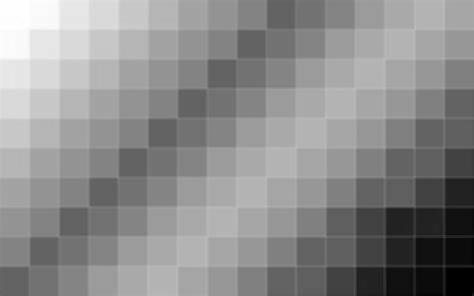

In [6]:
# Applying a basic low-pass filter
kernel = np.ones((3, 3), np.float32) / 9
dst = cv.filter2D(img, -1, kernel)
cv2_imshow(dst)
cv.waitKey()
cv.destroyAllWindows()

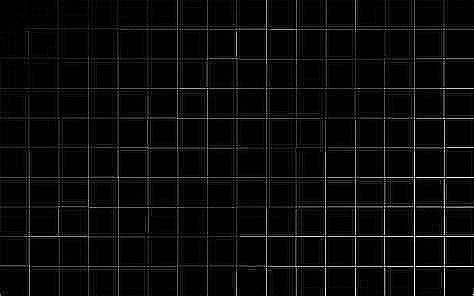

In [7]:
# Applying a basic high-pass filter
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

dst = cv.filter2D(img, -1, kernel2)
cv2_imshow(dst)
cv.waitKey()
cv.destroyAllWindows()

# Comparison between original and filtered image

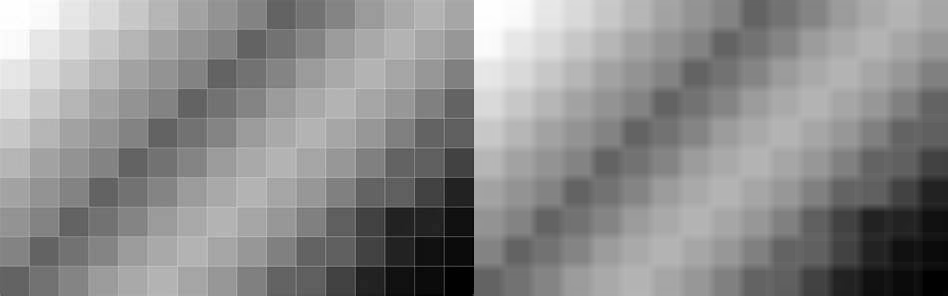

-1

In [8]:
kernel = np.ones((9, 9), np.float32) / 81
dst = cv.filter2D(img, -1, kernel)
res = np.hstack((img, dst))
cv2_imshow(res)
cv.waitKey()

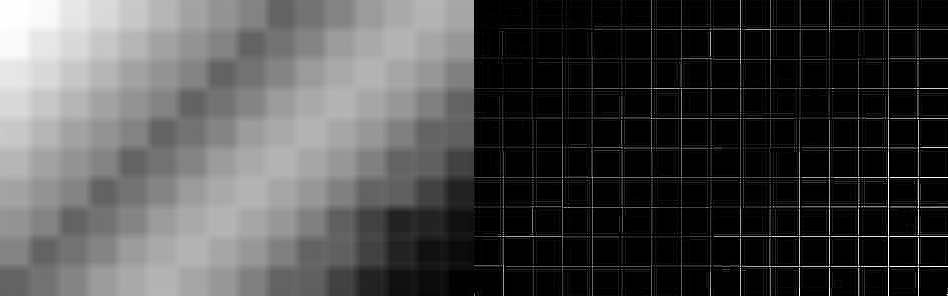

In [9]:
# Comparison between high=pass filtered and low-pass filtered image
dst1 = cv.filter2D(img, -1, kernel)
dst2 = cv.filter2D(img, -1, kernel2)
res = np.hstack((dst1, dst2));
cv2_imshow(res)
cv.waitKey()
cv.destroyAllWindows()

## Canny Edge Detection

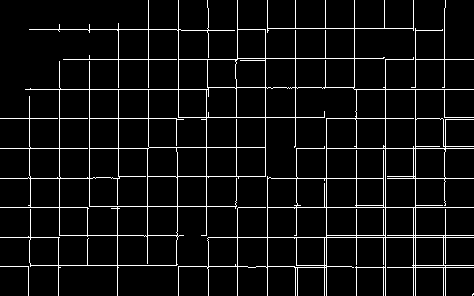

In [15]:
edges = cv.Canny(img, 70, 200)
cv2_imshow(edges)
cv.waitKey()
cv.destroyAllWindows()